# RAuT2
## Kompleksnost

#### Aleksandar Minja <br> Oktobar 2019

Za iscrtavanje grafika koristimo JAVA biblioteku [XChart](https://github.com/knowm/XChart).

In [1]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;
import org.knowm.xchart.style.markers.SeriesMarkers;

**XChart** je JAVA biblioteka koja omogućava lako i brzo iscrtavanje grafika. XChart ima veliki broj opcija i podržava iscrtavanje različitih vrsta grafika, ali će ovde biti prikazan samo **XYChart**. **QuickChart** je pomoćna klasa koja omogućava jednostavno kreiranje raznih grafika. Statička metoda za kreiranje **XYChart** grafika se zove **_getChart_** i prima sledeće parametre
* String: naslov 
* String: tekst na x – osi
* String: tekst na y – osi
* String: naziv grafika
* Niz realnih brojeva: x koordinata podataka za iscrtavanje
* Niz realnih brojeva: y koordinata podataka za iscrtavanje

Za prikaz grafika na ekran, koristimo **BitmapEncoder**. 

In [2]:
double[] xData = new double[] { 0.0, 1.0, 2.0 };
double[] yData = new double[] { 0.0, 1.0, 5.0 };

XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", xData, yData);

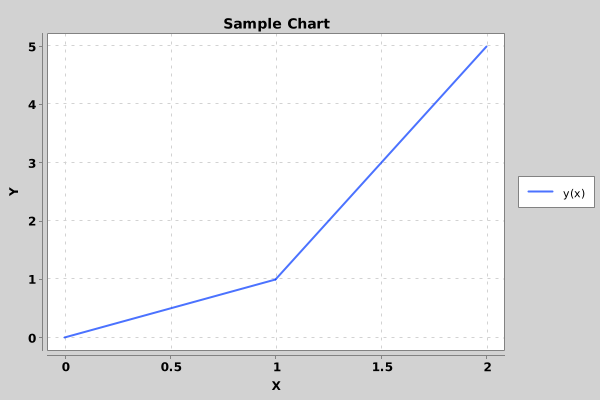

In [3]:
BitmapEncoder.getBufferedImage(chart);

## Asimptotska kompleksnost

Za datu funkciju: $g(x) = 1.1 x^2 + 10 + sin(x + 1.5)x^{1.5}+300$, možemo videti da se ona asimptotski ponaša kao funkcija $c\cdot x^2$, gde je $c$ proizvoljna konstanta.

In [4]:
interface Function<K,V>{
    V doit(K k);
}

In [5]:
Function<Double, Double> g = (x) -> { return 1.1*x*x + 10. + Math.sin(x + 1.5)*Math.pow(x, 1.5) + 300.;}

In [6]:
double x[] = new double[100];
double y[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x[i] = (double)i;
    y[i] = g.doit(x[i]);
}

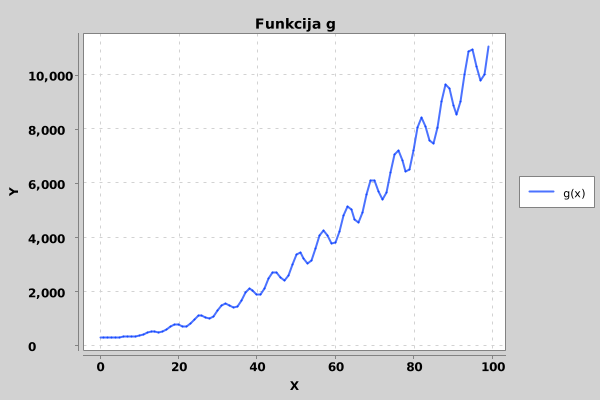

In [7]:
XYChart chart = QuickChart.getChart("Funkcija g", "X", "Y", "g(x)", x, y);
BitmapEncoder.getBufferedImage(chart);

In [8]:
double x1[] = new double[100];
double y1[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x1[i] = (double)i;
    y1[i] = x[i] * x[i];
}

XYSeries series = chart.addSeries("Theta(f)", x1, y1);
series.setMarker(SeriesMarkers.NONE);

org.knowm.xchart.XYSeries@f859de2

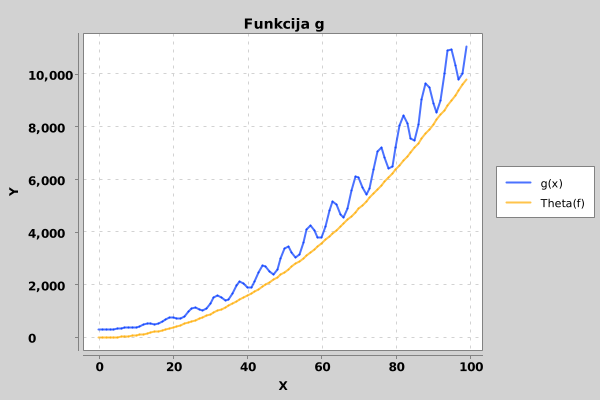

In [9]:
BitmapEncoder.getBufferedImage(chart);

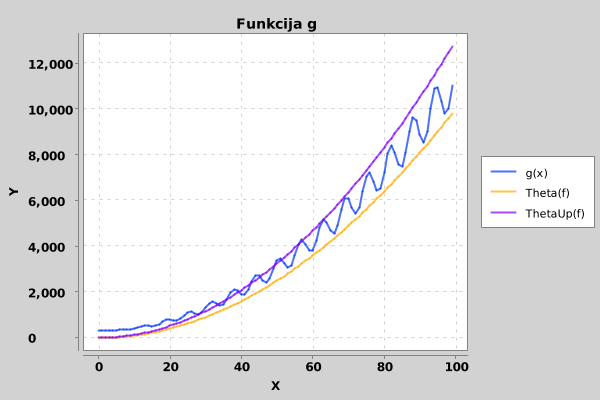

In [10]:
double x2[] = new double[100];
double y2[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x2[i] = (double)i;
    y2[i] = 1.3*x[i] * x[i];
}

XYSeries series = chart.addSeries("ThetaUp(f)", x2, y2);
series.setMarker(SeriesMarkers.NONE);
BitmapEncoder.getBufferedImage(chart);

Asimptotski, kako $x \rightarrow \infty $, u gornjem primeru (funkcija $g(x)$) dominira samo član $x^2$, pa se ostali članovi mogu zanemariti. 

Ukoliko važi da se neka funkcija $g(x)$ može ograničiti sa gornje i donje strane sa funkcijom $c \cdot f(x)$, kako $x \rightarrow \infty $, tada kažemo da $g(x) = \Theta(f(x))$. 

U većini slučajeva nas konstanta $c$ ne zanima.

U mnogim slučajevima nemamo donje ograničenje, kao na primer:

$g(x) = x (1 + sin(x))$

In [ ]:
Function<Double, Double> g = (x) -> { return x*(1 + Math.sin(x));}

In [ ]:
double x[] = new double[100];
double y[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x[i] = (double)i;
    y[i] = g.doit(x[i]);
}

XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", x, y);
BitmapEncoder.getBufferedImage(chart);

Ova funkcija je sa donje strane uvek 0, dok je sa gornje strane ograničena sa linearnom funkcijom $f(x) = x$.

In [ ]:
double x1[] = new double[100];
double y1[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x1[i] = (double)i;
    y1[i] = 2*x1[i];
}
var series = chart.addSeries("ThetaUp(f)", x1, y1);
series.setMarker(SeriesMarkers.NONE);
BitmapEncoder.getBufferedImage(chart);

Ako je neka funkcija $g(x)$ ograničena sa gornje strane sa funkcijom $c \cdot f(x)$, kažemo $g(x) = O(f(x))$

U većini praktičnih slučajeva nas interesuje samo gornje ograničenje (najgori mogući slučaj).

Takođe postoje slučajevi kad se donja i gornja granica "ne slažu". Na primer:

$g(x) = (1 + sin(x)) * x^{1.5} + x^{1.4}$

Ova funkcija je sa gornje strane ograničena sa $f_1(x) = x^{1.5}$, pa kažemo $g(x) = O(f_1(x))$, a sa donje strane je ograničena sa funkcijom $f_2(x) = x^{1.4}$, pa kažemo $g(x) = \Omega(f_2(x))$

In [ ]:
Function<Double, Double> g = (x) -> { return (1 + Math.sin(x)) * Math.pow(x,1.5) + Math.pow(x,1.4);}

In [ ]:
double x[] = new double[100];
double y[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x[i] = (double)i;
    y[i] = g.doit(x[i]);
}

XYChart chart = QuickChart.getChart("Sample Chart", "X", "Y", "y(x)", x, y);
BitmapEncoder.getBufferedImage(chart);

In [ ]:
double x1[] = new double[100];
double y1[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x1[i] = (double)i;
    y1[i] = Math.pow(x[i], 1.4);
}
var series = chart.addSeries("ThetaDown(f)", x1, y1);
series.setMarker(SeriesMarkers.NONE);
BitmapEncoder.getBufferedImage(chart);

In [ ]:
double x2[] = new double[100];
double y2[] = new double[100];

for(var i = 0; i < 100; ++i) {
    x2[i] = (double)i;
    y2[i] = 2.8*Math.pow(x[i], 1.5);
}
var series = chart.addSeries("ThetaUp(f)", x2, y2);
series.setMarker(SeriesMarkers.NONE);
BitmapEncoder.getBufferedImage(chart);

U ovom slučaju kad je funkcija $g(x)$ sa gornje strane ograničena sa funkcijom $f_1(x)$ a sa donje strane $f_2(x)$, postavlja se pitanje kako ćemo prikazati njenu kompleksnost: $g(x) = \Theta(?)$.

Jedino što možemo da kažemo jeste $g(x) = O(f_1(x))$ i $g(x) = \Omega(f_2(x))$.

### Klase kompleksnosti:

* $\Theta(1)$ - konstantno vreme
* $\Theta(\log N)$ - logaritamsko vreme
* $\Theta(N)$ - linearno vreme
* $\Theta(N\log N)$ - loglinearno (kvazilinearno) vreme
* $\Theta(N^2)$ - kvadratno vreme
* $\Theta(N^k)$ - polinomijalno vreme
* $\Theta(k^N)$ - eksponencijalno vreme
* $\Theta(N!)$ - faktorijel


### Kompleksnost Algoritama

**Algoritam:** Niz koraka (skup operacija) da bi se rešio problem.

**Kompleksnost algoritma:** Broj koraka potreban da bi se izvršio algoritam (rešio problem)

Kompleksnost algoritma često zavisi od veličine ulaza. Jedan od najjednostavnijih problema jeste pretraga. 

**Problem:** Za proizvoljni niz $n$ i broj $x$, naći indeks broja $x$ u nizu $n$, ako postoji, u suprotnom vratiti -1.

**Rešenje - Linearna pretraga:** Iterirati kroz niz i proveriti da li je trenutni elemenat jednak broju $x$. Kad nađemo broj $x$, vraćamo njegov indeks u nizu, i završavamo program. Ukoliko dođemo do kraja niza, a nismo našli traženi broj, vraćamo -1. 

In [ ]:
int[] niz = {1, 2, 7, 8, 9, 3, 5, 6, 0, 4};
var x = 3;

In [ ]:
int linearSearch(int[] niz, int d, int g, int x) {
    if(d < g) {
        if(niz[d] == x)
            return d;
        else
            return linearSearch(niz, d+1, g, x);
    }
    return -1;
}

In [ ]:
linearSearch(niz, 0, niz.length, 5)

Ukoliko je niz sortiran moguće je ubrzati pretragu tako što u svakom koraku eliminišemo pola niza. Ova pretraga se zove metod polovljenja (eng. Binary Search ili Bisection Method). 

In [ ]:
int binarySearch(int[] niz, int d, int g, int x) {
    if(g < d) {
        var m = d + (g - d) / 2;
        
        if(niz[m] == x)
            return m;
            
        if(niz[m] > x) {
            return binarySearch(niz, d, m, x);
        }
        if(niz[m] < x) {
            return binarySearch(niz, m, g, x);
        }
    }
    return -1;
}

In [ ]:
int[] niz = {1, 2, 3, 4, 5, 6, 7, 8, 9};
binarySearch(niz,0,niz.length, 10)

### Reference



1. [MIT kurs Introduction to algorithms, 2011 godina](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/)  (primeri sa ovog kursa su uključeni u ovoj prezentaciji)
2. Cormen, Thomas, Charles Leiserson, Ronald Rivest, and Clifford Stein. Introduction to Algorithms. MIT Press, 2009. ISBN: 9780262033848.
3. Big-O notacija: https://en.wikipedia.org/wiki/Big_O_notation